<a href="https://colab.research.google.com/github/cornpip/lab/blob/main/divisionimg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

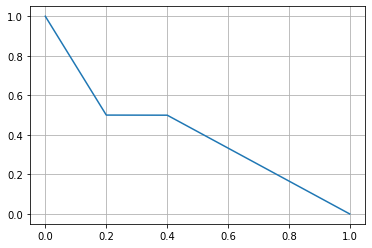

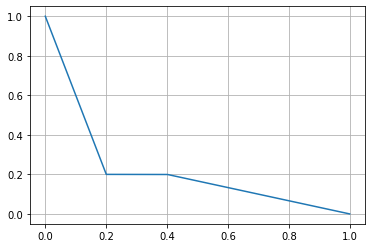

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
import math
from scipy.io.wavfile import write

class Eenvelope:
  def __init__(self):
    self.envelope = []
    self.t_option = []
  def Attack(self, x, t1):
    m = 1/t1
    y = m*x
    return y

  def Decay(self, x, t1, t2, slevel):
    m = (1-slevel)/(t2-t1)
    y = -m*(x-t1) + 1
    return y

  def Sustain(self, slevel):
    y = slevel
    return y

  def Release(self, x, t3, t4, slevel):
    m = slevel/(t4-t3)
    y = -m*(x-t3)+slevel
    return y

  def t_option(self, t1, t2, t3, t4):
    return [t1, t2, t3, t4]

  def result(self, t, t1, t2, t3, t4, slevel):
    for i in t:
      if (i < t1):
        self.envelope.append(self.Attack(i, t1))
      elif (t1 <= i < t2):
        self.envelope.append(self.Decay(i, t1, t2, slevel))
      elif (t2 <= i < t3):
        self.envelope.append(self.Sustain(slevel))
      elif (t3 <= i <= t4):
        self.envelope.append(self.Release(i, t3, t4, slevel))
    self.t_option = [t1, t2, t3, t4]
    return self.envelope, self.t_option

fs = 10e4
t = np.arange(0, 1, 1 / fs )

b = Eenvelope()
envelope1, t1_opt = b.result(t, 0, 0.2, 0.4, 1, 0.5) 
plt.plot(t, envelope1)
plt.grid()
plt.show()

a = Eenvelope()
envelope2, t2_opt = a.result(t, 0, 0.2, 0.4, 1, 0.2)
plt.plot(t, envelope2)
plt.grid()
plt.show()

# 일단 Release time맞춰주고 slevel 조정하는게 나은듯

[0, 86]
[0, 86, 173]
[0, 86, 173, 259]
[0, 86, 173, 259, 346]
[0, 86, 173, 259, 346, 433]
(86, 347, 3)


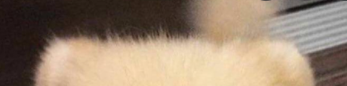

(87, 347, 3)


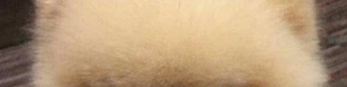

(86, 347, 3)


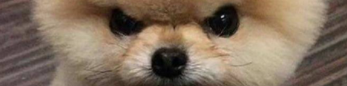

(87, 347, 3)


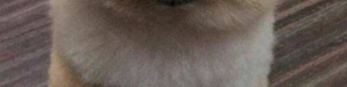

(87, 347, 3)


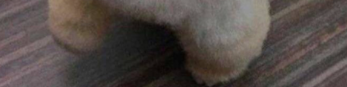

[0.22000344 0.05370976 0.05465657 0.31743846 1.         0.46359098
 0.27810294 0.14821828 0.02797383 0.00490618]
2093.0048
0.4 1
stacktime 0.6
stack_haed -60000


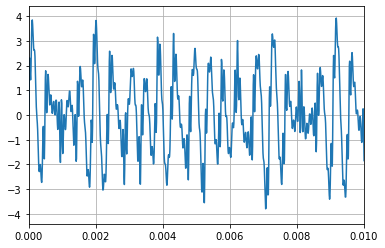

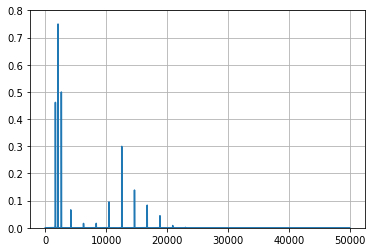

[0.00731261 0.12075435 0.32088906 1.         0.71297989 0.47474262
 0.20071202 0.05320889 0.01231598 0.00182815]
2217.461341916858
0.4 1
stacktime 0.6
stack_haed 40000


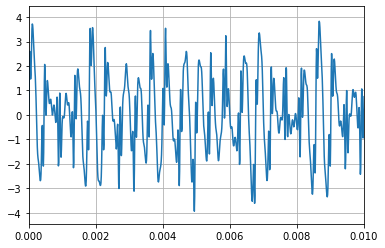

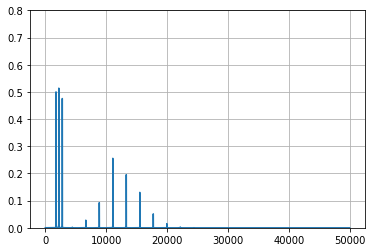

[0.0482034  0.44048765 1.         0.42027591 0.25080205 0.1536734
 0.05654475 0.01459737 0.00497273 0.00393006]
1108.730670958429
0.4 1
stacktime 0.6
stack_haed 80000


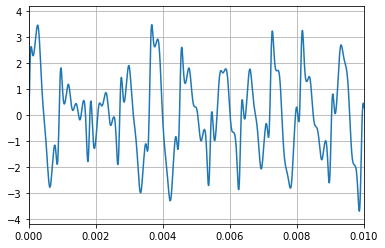

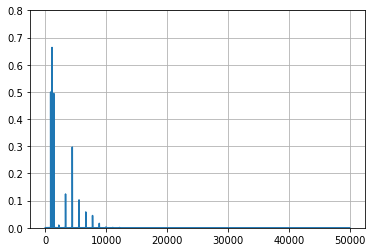

[4.65721317e-01 8.03234501e-01 1.00000000e+00 7.83429040e-01
 3.62709481e-01 1.03363413e-01 1.42974335e-02 3.86733857e-03
 8.20344545e-04 4.68768311e-04]
261.6256
0.4 1
stacktime 0.6
stack_haed 120000


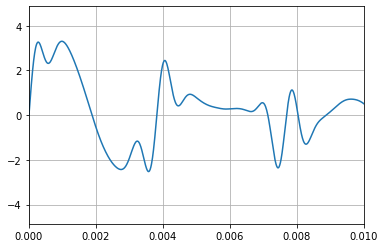

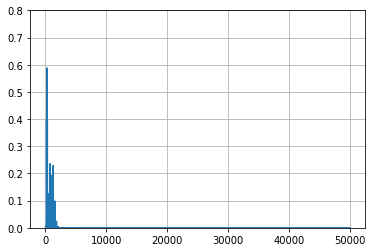

[6.23426110e-01 1.00000000e+00 4.19151756e-01 2.35669317e-01
 1.51838966e-01 5.90622929e-02 8.11795891e-03 2.07090789e-03
 9.11199470e-04 4.97017893e-04]
523.2512
0.4 1
stacktime 0.6
stack_haed 160000


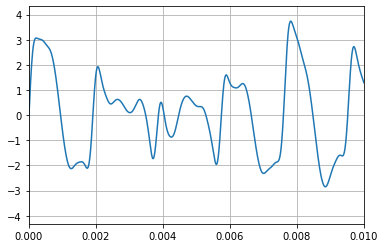

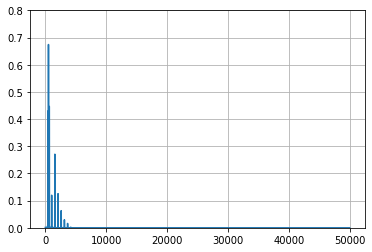

total_signal shape= (260000,)


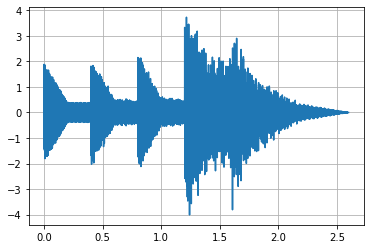

In [ ]:
rowcolumn = 0  # 0=행 기준으로, 1=열 기준으로 자름
divnum = 5
first_oct = 32.7032

img = cv2.imread('/dog.PNG')

img1 = img.copy()
divimage = []
r = [0]
for i in range(divnum):
  r.append(math.trunc(img1.shape[rowcolumn]/divnum * (i+1)))
  print(r)
  if (rowcolumn):
    divimage.append(img1[0:, r[i]:r[i+1]])
  else :
    divimage.append(img1[r[i]:r[i+1], 0:])

for i in range(divnum):
  print(divimage[i].shape)
  cv2_imshow(divimage[i])

total_signal = []
for i in range(divnum):
  hsv = cv2.cvtColor(divimage[i], cv2.COLOR_BGR2HSV)
  h,s,v = cv2.split(hsv)
  hisH, bin = np.histogram(h, 12)
  hisS, bin2 = np.histogram(s, 10)
  hisV, bin3 = np.histogram(v, 7)

  his_H = np.array(hisH)
  hisH_max_index = np.argmax(his_H)

  his_S = np.array(hisS)
  hisS_max_index = np.argmax(his_S)
  his_S1 = his_S/max(hisS)
  print(his_S1)

  his_V = np.array(hisV)
  hisV_max_index = np.argmax(his_V)

  sound_oct = first_oct * 2 ** (hisV_max_index)
  f0 = sound_oct * 2 ** (hisH_max_index/12)
  print(f0)

  #fs = 10e4
  #t = np.arange(0, 1, 1 / fs )

  #f0 주파수가 1값으로 안나오고 고조파가 더 크게나와서 1.5로 일단 조정
  #소리 좋게 f0, 고조파 가중치 조정하자
  signal = 1.5*np.sin(2 * np.pi * f0 * t)+ np.sin(2*np.pi*f0* 2**(4/12)* t)+ np.sin(2*np.pi*f0* 2**(-4/12)* t)
  for j in range (len(his_S1)):
    signal += 0.6 * his_S1[j] * np.sin(2* np.pi *(j+2)*f0*t)
  
  ensignal = 0
  t3, t4 = (0,0)
  if (f0 > 493.8833):
    ensignal = signal * envelope2
    t3, t4 = t2_opt[2:]
  else :
    ensignal = signal * envelope1
    t3, t4 = t1_opt[2:]
  
  if (f0 > 493.8833):
    ensignal = (0.7 - f0/10000) * ensignal
  if (f0 < 130.8128):
    ensignal = (1.3 + 7/f0) * ensignal

  print(t3,t4)
  # stacktime을 Release타임과 관련하여
  stacktime = round((t4-t3), 1) #소수 둘째자리에서 반올림
  #stacktime = 0.3
  s_stacktime = t4 - stacktime
  stack_t = np.arange(0, stacktime, 1/fs)
  nostacktime = len(stack_t)

  print("stacktime",stacktime)
  print("stack_haed",int(len(total_signal)-(stacktime*fs))) #stacktime dtype 때문에 int해줘야 err없음
  
  if (i == 0 or stacktime == 0 ):
    total_signal = np.append(total_signal, ensignal)

  elif (i != 0 and stacktime != 0):
    total_signal[int(len(total_signal)-(stacktime*fs)):] += ensignal[0:nostacktime]
    total_signal = np.append(total_signal, ensignal[nostacktime:])

  plt.plot(t, signal)
  plt.xlim(0,0.01)
  plt.grid()
  plt.show()

  length = len(signal)
  fft = np.fft.fft(signal) / length
  fft = fft[range(math.trunc(length/2))]
  fft_abs = abs(fft)

  f = np.arange(length) * fs/length 
  f = f[range(math.trunc(length/2))]

  plt.plot(f, fft_abs)
  plt.ylim(0, 0.8)                                                                                     
  plt.grid()                                                                                  
  plt.show() 

  #plt.plot(t, ensignal)
  #plt.xlim(0, 1)
  #plt.grid()
  #plt.show()

print("total_signal shape=",total_signal.shape)
total_len_t = len(total_signal)/fs
total_t = np.arange(0, total_len_t, 1/fs)

plt.plot(total_t, total_signal)
plt.grid()
plt.show()

total_length = len(total_signal)
#total_signal = total_signal[range(math.trunc(total_length/5 * 5))]
scaled = np.int16(1000 * total_signal)
write('dog_signal_release2.wav', math.trunc(total_length/total_len_t), scaled)


In [ ]:
b = np.array([5, 1, 3])
#b =np.array(b)
print(b)
print(b.shape)

a = np.array([2,4,1])
#a =np.array(a)
print(a)
print(a.shape)

e = []
#e = np.array(e)
e = np.append(e, b)
print(e[1],e[0],e[2])

if ( e != []):
  print("hi")

[5 1 3]
(3,)
[2 4 1]
(3,)
1.0 5.0 3.0
hi


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  app.launch_new_instance()


In [ ]:
c = []
d = np.array([3,2,1])
c = np.append(c,d)

e = np.array([2,5,3])

f = c[1:]+e[1:]
print(f)

d[1:]=f
print(d)

dd = int(8)//int(3)
print(dd)

c =[1,2,3,4]
a, b =c[2:]
print(a,b)



[7. 4.]
[3 7 4]
2
3 4
